In [9]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
COL = 20 ## 6 10 12. 15 fail at rl
ROW = 20 ## 4 10 12. 15 fail at rl

NUM_STATES = COL * ROW
NUM_ACTIONS = 4 # up down left right

FLAG_STATE = 13 # preset flag location. Must be less than COL * ROW

REWARD_FAIL = -10
REWARD_SUCCCESS = 100

## convert state to row and column
def getStateToRC(state):
    state2 = np.argmax(state)    
    r = state2 // COL ## col
    c = state2 % COL
    return r, c

## get state from row and column
def getRCToState(r, c):
    state = np.zeros([NUM_STATES], dtype=int)
    state[r*COL + c] = 1
    return state

## step function
def xp_step(state, action):    
    r, c = getStateToRC(state)    
    if (r > 0 and action == 0): ## 4 actions: up down left right
        r-=1
    if (r < ROW-1 and action == 1):
        r+=1
    if (c > 1 and action == 2):
        c-=1
    if (c < COL-1 and action == 3):
        c+=1

    state_new = getRCToState(r, c)
    done = False
    
    reward = REWARD_FAIL
    
    if (np.argmax(state_new) == FLAG_STATE):  ## fixed place
        done = True
        reward = REWARD_SUCCCESS
    
    return state_new, reward, done


In [3]:
np.random.seed(36)

from dqn_agent import Agent

agent = Agent(state_size=NUM_STATES, action_size=NUM_ACTIONS, seed=0)

# watch an untrained agent
 
state = np.zeros([NUM_STATES], dtype=int)
state[np.random.randint(0,NUM_STATES)] = 1

for j in range(2000):
    action = agent.act(state)
#     action = np.random.randint(0, NUM_ACTIONS -1)
    state, reward, done  = xp_step(state, action)
    if done:
        print("Done!")
        break 
#     else:
#         st = np.argmax(state)
#         print(f"At:{st} by {action}")

Done!


In [4]:
getRCToState(2,3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
getStateToRC([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

(0, 11)

Episode 100	Average Score: -2939.70
Episode 200	Average Score: -2693.50
Episode 300	Average Score: -1071.70
Episode 400	Average Score: -345.900
Episode 500	Average Score: -310.30
Episode 600	Average Score: -138.30
Episode 700	Average Score: -132.60
Episode 800	Average Score: -144.50
Episode 900	Average Score: -341.10
Episode 1000	Average Score: -159.50
Episode 1100	Average Score: -327.80
Episode 1200	Average Score: -174.10
Episode 1300	Average Score: -177.60
Episode 1400	Average Score: -97.800
Episode 1500	Average Score: -307.00
Episode 1600	Average Score: -184.80
Episode 1700	Average Score: -83.200
Episode 1800	Average Score: -34.70
Episode 1900	Average Score: -53.40
Episode 2000	Average Score: -34.80
Episode 2100	Average Score: -76.40
Episode 2200	Average Score: -50.10
Episode 2300	Average Score: -137.90
Episode 2400	Average Score: -74.200
Episode 2500	Average Score: -99.100
Episode 2600	Average Score: -76.400
Episode 2700	Average Score: -91.600
Episode 2800	Average Score: -60.50
Epi

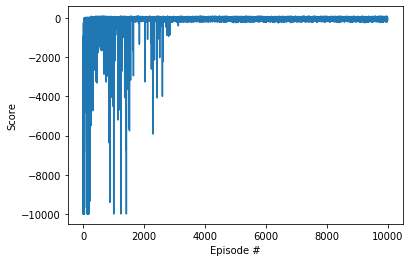

In [11]:
from dqn_agent import Agent

agent = Agent(state_size=NUM_STATES, action_size=NUM_ACTIONS, seed=0)


def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = np.zeros([NUM_STATES], dtype=int)
        state[np.random.randint(0,NUM_STATES)] = 1
        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
#             next_state, reward, done, _ = env.step(action)
            next_state, reward, done = xp_step(state, action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>= 20: ## threshhold here ... 
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn(n_episodes = 10000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(5):
    state = np.zeros([NUM_STATES], dtype=int)
    state[np.random.randint(0,NUM_STATES)] = 1
    
    start = np.argmax(state)
    print(f"{i}::Start:{start}")
    for j in range(200):
        action = agent.act(state)
        print(f"{j}::action:{action}")
        state, reward, done = xp_step(state, action)
        
        end = np.argmax(state)
        if done:
            print(f"Reward:{reward} at {end}")
            break 

0::Start:146
0::action:3
1::action:0
2::action:3
3::action:3
4::action:0
5::action:0
6::action:0
7::action:3
8::action:0
9::action:3
10::action:0
11::action:3
12::action:0
13::action:3
Reward:100 at 13
1::Start:146
0::action:3
1::action:0
2::action:3
3::action:3
4::action:0
5::action:0
6::action:0
7::action:3
8::action:0
9::action:3
10::action:0
11::action:3
12::action:0
13::action:3
Reward:100 at 13
2::Start:379
0::action:3
1::action:3
2::action:3
3::action:3
4::action:3
5::action:3
6::action:3
7::action:3
8::action:3
9::action:3
10::action:3
11::action:3
12::action:3
13::action:3
14::action:3
15::action:3
16::action:3
17::action:3
18::action:3
19::action:3
20::action:3
21::action:3
22::action:3
23::action:3
24::action:3
25::action:3
26::action:3
27::action:3
28::action:3
29::action:3
30::action:3
31::action:3
32::action:3
33::action:3
34::action:3
35::action:3
36::action:3
37::action:3
38::action:3
39::action:3
40::action:3
41::action:3
42::action:3
43::action:3
44::action:3
45::acti